<a href="https://colab.research.google.com/github/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling/blob/main/INPE_CAP425_ProjetoFinal_PredictRain_Lourenco_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **Projeto Final da disciplina de Tópicos Avançados em Modelagem Ambiental (CAP-425)**
**Professores:**
*Dr. Leonardo Bacelar Lima Santos e Dr. Stephan Stephany*

**Aluno:**
*Lourenço José Cavalcante Neto*
<hr style="border:2px solid #0077b9;">

# **<span style="color:#336699">Aplicação de Redes Neurais Artificiais na classificação da chuva a partir de dados meteorológicos obtidos por disdrômetro e radiômetro de microondas</span>**

<hr style="border:2px solid #0077b9;">



# **INTRODUÇÃO**

A previsão ou classificação da chuva segundo a sua intensidade tem sido uma das grandes preocupações mundiais. É um tema que está no radar de diversos pesquisadores e, além disso, tem atraído a atenção de indústrias, governos e de companhias aéreas, por ter relação direta com planejamentos e tomada de decisão.

No campo da meteorologia, é bem conhecido que a variável chuva possui muitas características bem diversas - devido a  sua distribuição espacial e temporal -, que dependem dos mecanismos físicos responsáveis pelas chuvas. Algumas pesquisas indicam que nos encontramos diante de um problema complexo e, por consequência disso, tem sido difícil de resolver. Essa variável é a apresenta maior correlação com eventos naturais adversos, como deslizamentos de terra, inundações, movimentos de massa e avalanches. Esses incidentes afetam a sociedade há anos \cite{b2}.

Uma das possibilidades de solução consistiria em se beneficiar de grandes bases de dados climáticos disponíveis, afim de estudar e classificar a chuva tomando como referência, entre outros fatores, as características relacionadas à sua ocorrência e intensidade. Para este estudo e por se tratar de um ponto focal específico, a intensidade horária média da preciptação em mm/h ficou definida conforme exibido na tabela abaixo:

# **ANÁLISE DO PROBLEMA**
O comportamento dos fenômenos pluviométricos tem relação forte com a precipitação local e repentina. Resultados de pesquisas recentes apontam que o clima e a capacidade humana de predizê-lo com o máximo de precisão possível têm desempenhado um papel crítico em muitos aspectos da vida. De atividades agrícolas ao planejamento para o final de semana de uma família, as companhias aéreas e a tomada de decisões logísticas, a chuva tem grande influência nos planejamentos. Há registros de casos em que o impacto da chuva causou grandes consequências financeiras. Paralelo a isso, é possível perceber que há um grande número de interessados no avanço do conhecimento neste tema e por consquência, aperfeiçoar a capacidade de prever e classificar a chuva com mais precisão. 

A pergunta de pesquisa que se pretende responder neste trabalho é: **em qual nível de acurácia um modelo preditivo consegue classificar a chuva, a partir de dados metorológicos oriundos do Disdrômetro RD80 e do Radiômetro de Microondas MP3000A, como chuva fraca, chuva moderada, chuva forte ou chuva muito forte?**

# **OBJETIVO**
O objetivo deste projeto é criar um modelo de **Rede Neural Artificial** da família **Multilayer Perceptron (MLP)** que seja capaz de auxiliar na classificação da chuva, usando dados de chuva disponíveis.

Este notebook também pode ser visualizado no meu diretório de materiais e atividades da disciplina CAP-425 no Github, [Clicando aqui](https://github.com/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling.git).



---



# **OS DADOS**
Os dados meteorológicos são oriundos de dois equipamentos (**Radiômetro de Microondas "MP3000A"** e o **Disdrômetro "RD80"**), ambos instalados próximo à torre ATTO, em um sítio chamado Campina, na região Amazônica. O MP3000A mede diversas variáveis ambiente, entre elas a radiância no espectro de onda do microonda em diversos canais e estimativas de parâmetros de nuvens. Já o RD80 mede a distribuição das gotas de chuva que chegam à superfície.

Os dados compreendem o período de 17 de março de 2020 a 07 julho 2022.

# **METODOLOGIA**
Visto que já foi realizada uma Análise Exploratória nos dados, tal qual foram observadas, principalmente, as variações nos padrões de chuva, a metodologia que será aplicada para o desenvolvimento deste trabalho será conforme segue abaixo: 
* Importação dos módulos e bibliotecas e o download dos dados para o ambiente de execução; 
* Conversão de dados para o formato que possibilite a realização dos experimentos e testes;
* Divisão dos dados em treinamento, validação e teste;

Por fim, tentaremos aplicar uma abordagem de aprendizado de máquina (Machine Learning), implementando e treinando uma Rede Neural da família multilayer perceptron (MLP) que seja capaz de  classificar a chuva.

# **IMPORTAÇÃO DOS MODULOS DE BIBLIOTÉCAS**
São várias as bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

In [ ]:
!pip install smote_variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 407 kB 2.1 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=371f8f85b6c259fc4c292a1f52c8b1b85e6e71fae8a0a35d7c7febdffd0ac45b
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=b3fbb8f78182d80dca0d519e390340f945c55dba26888f21afd0a979c10f1b90
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from random import choice

warnings.simplefilter('ignore')

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, plot_confusion_matrix, mean_squared_error, mean_absolute_error,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from math import sqrt


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Flatten
from keras.activations import sigmoid, softmax


# **OBTENDO OS ARQUIVOS DE DADOS**

Temos 01 arquivo de dados (Dataset):

**df_RD80_MP3000A_for_ClassifierRainfall**: Neste arquivo estão os dados do ambiente próximo à superfície, os dados das medidas dos canais do microonda, as variáveis estimadas associadas a parâmetros de nuvens e dados de medida da distribuição das gotas de chuva que chegam à superfície. Vamos realizar o download do Dataset:

In [ ]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook
!gdown --id 1J8GeAGq1xYBxVnBIP-qE1vOKqdc_0RtG

#!gdown --id 1emcBshvoS4TCGeeJHdjJmxj9FMWTlyLJ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1J8GeAGq1xYBxVnBIP-qE1vOKqdc_0RtG
To: /content/df_RD80_MP3000A_for_ClassifierRainfall.csv
100% 289M/289M [00:02<00:00, 126MB/s]


# **PREPROCESSAMENTO E VISUALIZAÇÃO DOS DADOS**

Os dados já foram tratados na fase aneterior deste trabalho. A partir daqui, o primeiro passo é abrir o CSV com o Pandas. Em uma visão inicial dos dados, temos:

In [ ]:
#Carregar o Dataset e criar o Dataframe
df_RD80 = pd.read_csv("/content/df_RD80_MP3000A_for_ClassifierRainfall.csv",parse_dates=[0], index_col=[0])
df_RD80_final = df_RD80.loc[df_RD80['Rain_Intensity_mm_h'] > 0] #Vamos considerar somente os dias que chveram

In [ ]:
#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_RD80_final.shape[0], ' - Quantidade de atributos: ', df_RD80_final.shape[1])

Tamanho do dataset:  17835  - Quantidade de atributos:  39


In [ ]:
df_RD80_final.loc[df_RD80_final['Rain_Intensity_mm_h'] >= 0].head(n=2).append(df_RD80_final.loc[df_RD80_final['Tamb_K'] > 0].tail(n=2))

,Year,Day,Month_,Hour,Minute,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Tamb_K,...,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Class_Rain
0,2022,17,1,13,47,0.14179,20.98903,0.01019,0.97649,23.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chuva fraca
1,2022,17,1,13,48,0.15971,23.59070,0.01125,0.99517,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chuva fraca
185275,2022,31,5,17,45,5.52877,1931.53613,0.31949,1.32428,27.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chuva moderada
185461,2022,31,5,20,51,99.40764,139959.20312,3.90797,2.44101,24.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chuva muito forte


## **Encontrando correlações com o Heatmap**

Primeiramente, vamos codificar a variável categórica **Class_Rain** usando uma função de substituição:

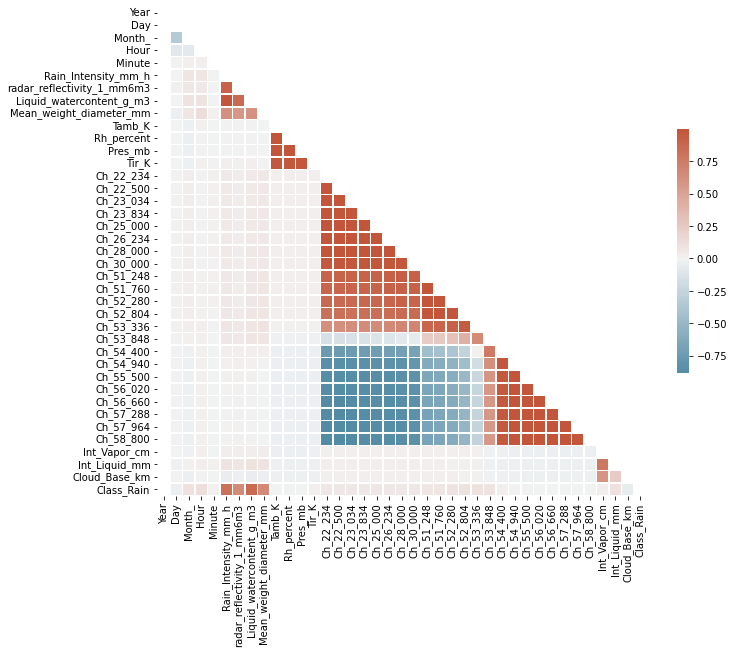

In [ ]:
# Generate a mask for the upper triangle
corr = df_RD80_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_RD80_final['Class_Rain'].replace({'Chuva fraca':1, 'Chuva moderada': 2, 'Chuva forte': 3, 'Chuva muito forte': 4}, inplace = True)


In [ ]:
df_RD80_final_features = ['Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm','Class_Rain']

In [ ]:
df_RD80_MP3000A  = df_RD80_final[df_RD80_final_features]

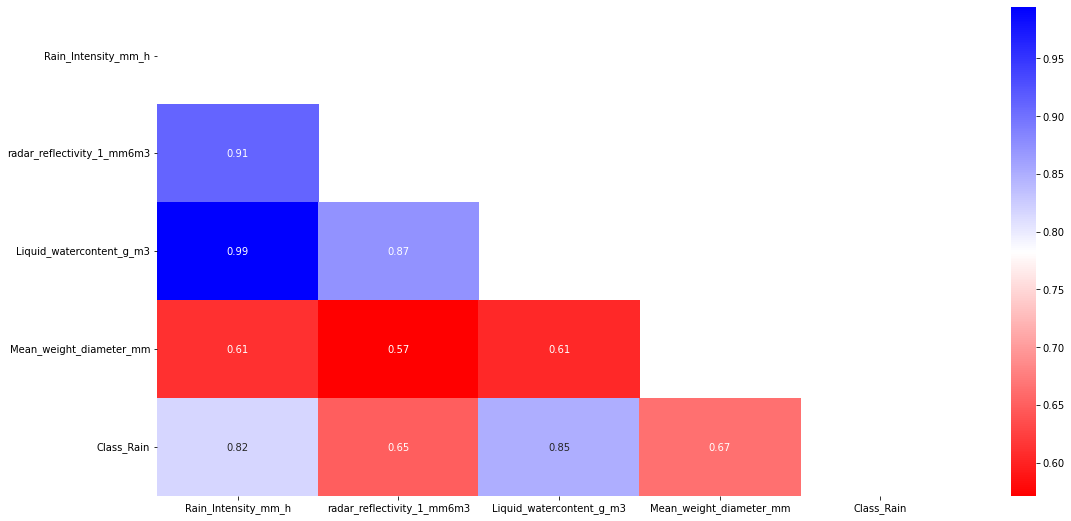

In [ ]:
matrix = np.triu(df_RD80_MP3000A.corr())
plt.figure(figsize=(18,9));
sns.heatmap(df_RD80_MP3000A.corr(),mask=matrix, annot=True, cmap='bwr_r');

In [ ]:
df_RD80_MP3000A['Class_Rain'].replace({1:'Chuva fraca', 2:'Chuva moderada', 3:'Chuva forte', 4:'Chuva muito forte'}, inplace = True)

In [ ]:
df_RD80_MP3000A.dtypes

Rain_Intensity_mm_h           float64
radar_reflectivity_1_mm6m3    float64
Liquid_watercontent_g_m3      float64
Mean_weight_diameter_mm       float64
Class_Rain                     object
dtype: object

Vamos olhar como está a **Proporção de classes** do nosso Dataset

In [ ]:
df_RD80_MP3000A['Class_Rain'].value_counts()

Chuva fraca          12014
Chuva moderada        3484
Chuva forte           1966
Chuva muito forte      371
Name: Class_Rain, dtype: int64

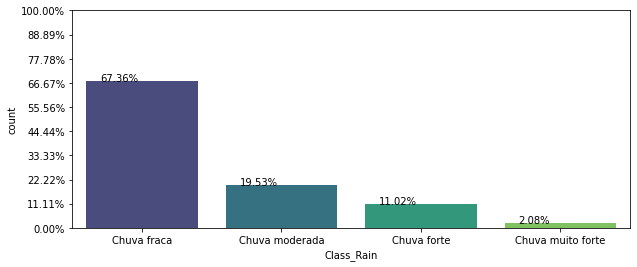

In [ ]:
total = len(df_RD80_MP3000A)
plt.figure(figsize=(10,4))
ax = sns.countplot(x = 'Class_Rain', data = df_RD80_MP3000A, palette='viridis')
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 10))
ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [ ]:
df_RD80_MP3000A.head()

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Class_Rain
0,0.14179,20.98903,0.01019,0.97649,Chuva fraca
1,0.15971,23.59070,0.01125,0.99517,Chuva fraca
23,0.10681,15.63035,0.00727,1.02612,Chuva fraca
61,0.45065,705.93176,0.01636,2.76723,Chuva fraca
64,0.40227,246.63791,0.01823,1.85144,Chuva fraca


Com exceção da nossa **target** ***Class_Rain***, vamos alterar o tipo de todas as **Features** escolhidas para o tipo **float64**.

In [ ]:
df_RD80_MP3000A[df_RD80_MP3000A.columns[0:4]] = df_RD80_MP3000A[df_RD80_MP3000A.columns[0:4]].astype('float64')
df_RD80_MP3000A.dtypes

Rain_Intensity_mm_h           float64
radar_reflectivity_1_mm6m3    float64
Liquid_watercontent_g_m3      float64
Mean_weight_diameter_mm       float64
Class_Rain                     object
dtype: object

Agora vamos transformar a **string** em enconder para poder fazer a leitura da ***feature*** nas próximas etapas.

In [ ]:
#Codificação dos rótulos: convertendo-os de strings para inteiros
le = LabelEncoder()
labels_target = le.fit_transform(df_RD80_MP3000A['Class_Rain'].values)
labels_target

array([1, 1, 1, ..., 1, 1, 1])

## **Divisão dos dados em treino, validação e teste**

In [ ]:
# realizar uma divisão de teste de treinamento, usando 70% dos dados para
# treinamento e 30% para avaliação
(x_train_rain, x_test_rain, y_train_rain, y_test_rain) = train_test_split(df_RD80_MP3000A[df_RD80_MP3000A.columns[0:4]].values, labels_target, random_state=0, test_size=0.30)
print('Tamanho do dataset para treinamento: ',len(x_train_rain))
print('Tamanho do dataset para validação: ',len(x_test_rain))

Tamanho do dataset para treinamento:  12484
Tamanho do dataset para validação:  5351


Verificação do **balanceamento dos dados**

Text(0.5, 0.98, 'Proporção de classes')

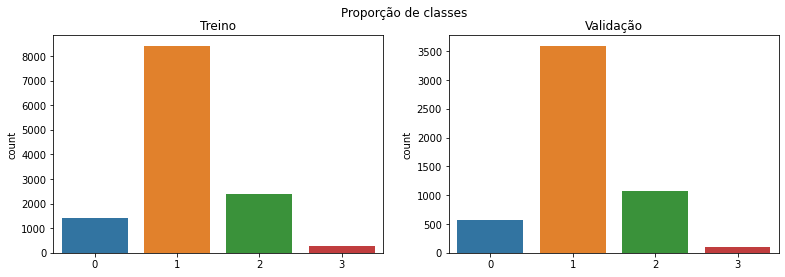

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
sns.countplot(y_train_rain,ax=ax[0])
sns.countplot(y_test_rain,ax=ax[1])
ax[0].set_title('Treino')
ax[1].set_title('Validação')
fig.suptitle('Proporção de classes')

Como podemos ver os nossos dados de treinamento estão desbalanceados. Vamos aplicar um balanceamento:

In [ ]:
#Balanceamento dos dados
import smote_variants as sv

oversampler= sv.MulticlassOversampling(oversampler='distance_SMOTE',
                                      oversampler_params={'random_state': 5})
x_train_rain, y_train_rain= oversampler.sample(x_train_rain, y_train_rain)

Text(0.5, 0.98, 'Proporção de classes')

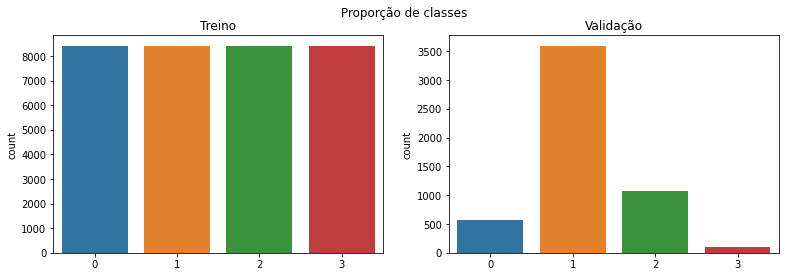

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
sns.countplot(y_train_rain,ax=ax[0])
sns.countplot(y_test_rain,ax=ax[1])
ax[0].set_title('Treino')
ax[1].set_title('Validação')
fig.suptitle('Proporção de classes')

Vamos verificar o tamanho dos dados de treino e teste, novamente.

In [ ]:
print('Tamanho do dataset para treinamento: ',len(x_train_rain))
print('Tamanho do dataset para validação: ',len(x_test_rain))

Tamanho do dataset para treinamento:  33675
Tamanho do dataset para validação:  5351


Para treinar uma rede MLP, os dados devem ser sempre dimensionados, pois são muito sensíveis a eles.

In [ ]:
#Normalização
sc=StandardScaler()

scaler = sc.fit(x_train_rain)
x_train_rain_scaled = scaler.transform(x_train_rain)
x_test_rain_scaled = scaler.transform(x_test_rain)

#**DEFINIÇÕES DO MODELO**
A partir daqui iremos criar e treinar os mdelos

* **Arquitetura 1**: Vamos definir três camadas ocultas para nossa Rede Neural, com **20**, **15** e **10 neurônios**, respectivamente, usando o solver = '**SGD**' e **L2** aplicada aos pesos para evitar que eles fiquem muito grandes. Também aplicaremos o **momentum** para atualização de gradiente descendente.



In [ ]:
#Definições do modelo
MLP_model_momen_yes = MLPClassifier(hidden_layer_sizes=(20,15,10),
                        activation = 'relu',
                        max_iter = 500,
                        n_iter_no_change=500,
                        random_state=1,
                        alpha=0.0005, #L2
                        batch_size=32,
                        learning_rate='constant',
                        momentum=0.3, #Entre 0 e 1. 
                        solver = 'sgd',
                        verbose=True)

* **Arquitetura 2**: Vamos definir três camadas ocultas para nossa Rede Neural, com **20**, **15** e **10 neurônios**, respectivamente, usando o solver = '**ADAM**' e **L2** aplicada aos pesos para evitar que eles fiquem muito grandes. Não aplicaremos o **momentum**;

In [ ]:
#Definições
MLP_model_momen_not = MLPClassifier(hidden_layer_sizes=(20,15,10),
                        activation = 'relu',
                        max_iter = 300,
                        #tol = 0.00000001, #Tolerância minima
                        n_iter_no_change=300,
                        random_state=1,
                        alpha=0.0005, #L2
                        batch_size=32,
                        learning_rate='constant',
                        solver = 'adam',
                        verbose=True)



In [ ]:
models = [MLP_model_momen_yes, MLP_model_momen_not]

**Treino dos modelos**

In [ ]:
# Treino dos modelos

for i in range(0,2):
  print(f'\nTreinando o modelo:\n{models[i]}\n')
  models[i].fit(x_train_rain_scaled, y_train_rain)


Treinando o mdelo:
MLPClassifier(alpha=0.0005, batch_size=32, hidden_layer_sizes=(20, 15, 10),
              max_iter=500, momentum=0.3, n_iter_no_change=500, random_state=1,
              solver='sgd', verbose=True)

Iteration 1, loss = 1.18825794
Iteration 2, loss = 0.83886486
Iteration 3, loss = 0.63655463
Iteration 4, loss = 0.51803380
Iteration 5, loss = 0.43944395
Iteration 6, loss = 0.38026685
Iteration 7, loss = 0.33229841
Iteration 8, loss = 0.29161055
Iteration 9, loss = 0.25559742
Iteration 10, loss = 0.22285353
Iteration 11, loss = 0.19317701
Iteration 12, loss = 0.16684561
Iteration 13, loss = 0.14423695
Iteration 14, loss = 0.12489755
Iteration 15, loss = 0.10869338
Iteration 16, loss = 0.09587221
Iteration 17, loss = 0.08552693
Iteration 18, loss = 0.07709242
Iteration 19, loss = 0.07015074
Iteration 20, loss = 0.06430249
Iteration 21, loss = 0.05942069
Iteration 22, loss = 0.05530058
Iteration 23, loss = 0.05182087
Iteration 24, loss = 0.04879274
Iteration 25, loss = 0

## **Visualização do resultado do treinamento através de uma curva de aprendizagem**

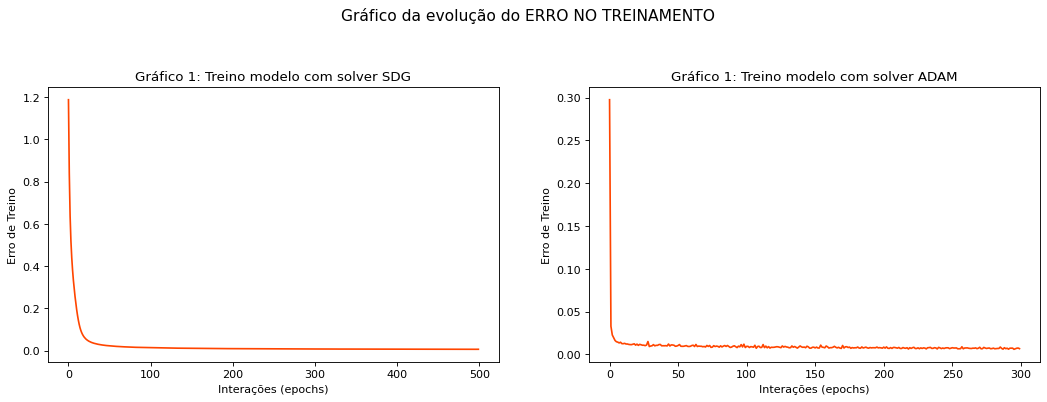

In [ ]:
# Traçar a CURVA DE APRENDIZAGEM
labels_title = ['Gráfico 1: Treino modelo com solver SDG', 'Gráfico 1: Treino modelo com solver ADAM']
plt.figure(figsize=(16,10),dpi=80)
plt.suptitle('Gráfico da evolução do ERRO NO TREINAMENTO', size=14)
for i in range(0,2):

  plt.subplot(2,2,i+1)
  plt.title(labels_title[i])
  plt.xlabel("Interações (epochs)")
  plt.ylabel("Erro de Treino")
  plt.plot(models[i].loss_curve_, color='#FF4500', label="MLP - Evolução do ERRO DE TREINO")
plt.show()

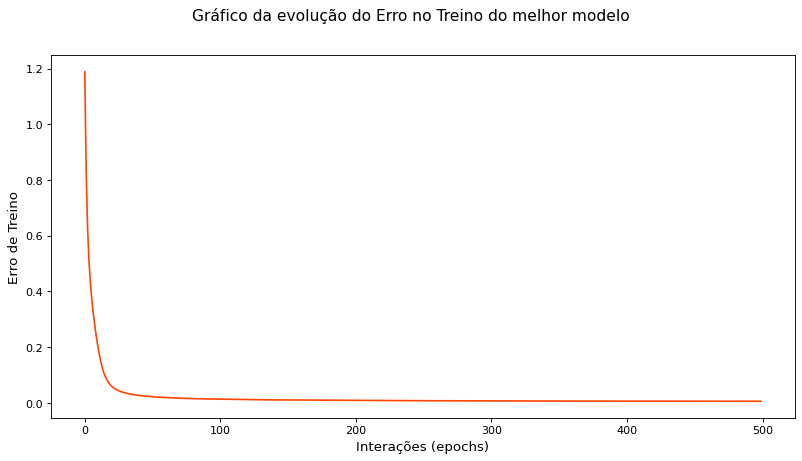

In [ ]:
#CURVA do ERRO DE APRENDIZAGEM do melhor modelo

plt.figure(figsize=(12,6),dpi=80)
plt.suptitle('Gráfico da evolução do Erro no Treino do melhor modelo', size=14)

plt.xlabel("Interações (epochs)" , size=12)
plt.ylabel("Erro de Treino" , size=12)
plt.plot(models[0].loss_curve_, color='#FF4500', label="MLP - Evolução do ERRO DE TREINO")
plt.show()

Gráfico da evolução do ERRO durante o treinamento do modelo com o solver **SGD** e com o solver **Adam**.

# **AVALIAÇÃO DO MODELO**
Para avaliar nosso classificador, vamos utilizar a métrica RMSE (root mean squared error), o relatório de classificação e a matriz de confusão e, ao final, iremos realizar um último teste, utilizando novos dados nos quais o modelo também não "viu" durante o treinamento.

## **Previsões sobre nossos dados e mostragem da pontuação de precisão**

In [ ]:
# Fazendo previsões sobre nossos dados e mostrando uma pontuação de precisão
MLP_accur = []
predictions = []
labels_title = ['Modelo COM momentum', 'Modelo SEM momentum']
for i in range(0,2):
  print(f'\n{labels_title[i]}')
  predictions.append(models[i].predict(x_test_rain_scaled))
  MLP_accur.append(round((accuracy_score(y_test_rain, predictions[i]))*100,2))


  print(f"\nPontuação do conjunto de treinamento: {round((models[i].score(x_train_rain_scaled, y_train_rain)*100),2)}%")

  print(f'A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: {MLP_accur[i]}%\n')
  score_obj = dict(zip(['Accuracy Score'], [[MLP_accur[i]]]))
  score_df = pd.DataFrame(score_obj, index=['MLP'])
  print(score_df)
  print("|------------------------------------------------------------------------------------|")


Modelo COM momentum

Pontuação do conjunto de treinamento: 99.89%
A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: 99.46%

     Accuracy Score
MLP           99.46
|------------------------------------------------------------------------------------|

Modelo SEM momentum

Pontuação do conjunto de treinamento: 99.74%
A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: 98.95%

     Accuracy Score
MLP           98.95
|------------------------------------------------------------------------------------|


Podemos perceber que a precisão da capacidade do modelo MLP de classificar a chuva chega a **98.5% usando o momentum**, enquanto o modelo **sem o momentum chega a 95.94%**.

## **Métrica RMSE**

A métrica RMSE é uma medida de distância entre o destino previsto e a resposta real. Quanto menor o valor de RMSE, melhor será a precisão preditiva de um modelo. Dito de outra maneira, é uma métrica que retorna a magnitude do erro e não do acerto. Um modelo com uma RMSE igual a 0 teria suas previsões perfeitamente corretas.

In [ ]:
for i in range(0,2):
  rmse = sqrt(mean_squared_error(y_test_rain, predictions[i]))
  print(f'RMSE {labels_title[i]}: {round(rmse, 3)}')

RMSE Modelo COM momentum: 0.13
RMSE Modelo SEM momentum: 0.169


## **Relatório de classificação**

In [ ]:

labels = ['Chuva fraca','Chuva moderada','Chuva forte','Chuva muito forte']
for i in range(0,2):
  print(f'\nclassification_report do Modelo')
  print(classification_report(y_test_rain, predictions[i], target_names=labels, zero_division=0)) #zero_division=0


classification_report do Modelo
                   precision    recall  f1-score   support

      Chuva fraca       0.99      0.99      0.99       569
   Chuva moderada       1.00      1.00      1.00      3595
      Chuva forte       0.99      0.99      0.99      1079
Chuva muito forte       0.98      0.98      0.98       108

         accuracy                           0.99      5351
        macro avg       0.99      0.99      0.99      5351
     weighted avg       0.99      0.99      0.99      5351


classification_report do Modelo
                   precision    recall  f1-score   support

      Chuva fraca       0.99      0.98      0.98       569
   Chuva moderada       1.00      0.99      0.99      3595
      Chuva forte       0.97      0.99      0.98      1079
Chuva muito forte       0.97      0.95      0.96       108

         accuracy                           0.99      5351
        macro avg       0.98      0.98      0.98      5351
     weighted avg       0.99      0.99      

## **Matriz de confusão do melhor modelo**

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (12,5), fontsize=14):
  
  confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names )
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f")
  except ValueError:
    raise ValueError("Os valores da matriz de confusão devem ser inteiros.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=11)
  plt.title('Matriz de confusão do Classificador', fontsize=15)
  plt.ylabel('Classe verdadeira', fontsize=fontsize)
  plt.xlabel('Classe prevista', fontsize=fontsize)

In [ ]:
predictions_2 = models[0].predict(x_test_rain_scaled)
labels = ['Chuva fraca','Chuva moderada','Chuva forte','Chuva muito forte']
c = confusion_matrix(y_test_rain, predictions_2)

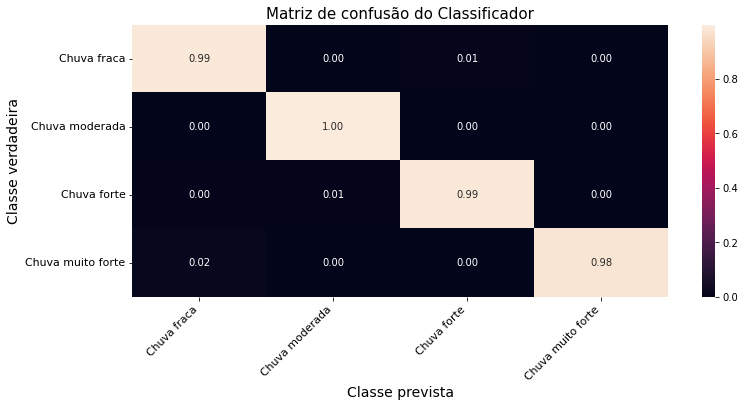

In [ ]:
#Exibe a matriz de confusão
print_confusion_matrix(c, class_names=labels)

## **Classificação da chuva para novos dados**

Afim de tentar confirmar os resultados da avaliação nos testes, vamos usar a função **sample()** do **pandas** para selecionar aleatoriamente algumas rows do nosso Dataframe para testar novamente o modelo de classificação da chuva e ver como ele se comporta.

In [ ]:
df_RD80_MP3000A.columns


Index(['Month_', 'Hour', 'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Int_Liquid_mm', 'Int_Vapor_cm', 'Class_Rain'],
      dtype='object')

In [ ]:
# Seleciona uma linha do dataframe aleatoriamente

for res in range(0,2):
  class_real = []
  res_class_predict = []
  indexes = []
  for contador in range(0,5):
    indexes.append(contador)
    df_RD80_class_real = df_RD80_MP3000A.sample(axis = 0)
    class_real.append(df_RD80_class_real['Class_Rain'])

    df_RD80_class_predict = df_RD80_class_real.drop(columns=['Class_Rain'])

    #Teste de classificação da chuva com o modelo

    result_predict_class = le.classes_[models[res].predict(np.array([df_RD80_class_predict]).reshape(1,-1))][0]
    res_class_predict.append(result_predict_class)

  #class_real = pd.DataFrame(class_real)
  resultados = {'ID':indexes,'Classe Real':class_real, 'Classe Predita':res_class_predict}
  df_resultados = pd.DataFrame.from_dict(resultados, orient='index')

  df_resultados = df_resultados.T

  df_resultados.dropna(inplace=True)
  df_resultados.reset_index(inplace=True, drop=True)

df_resultados.head()


,ID,Classe Real,Classe Predita
0,0,"63595 Chuva fraca Name: Class_Rain, dtype: ...",Chuva fraca
1,1,"115995 Chuva fraca Name: Class_Rain, dtype:...",Chuva fraca
2,2,"57547 Chuva fraca Name: Class_Rain, dtype: ...",Chuva fraca
3,3,"146709 Chuva fraca Name: Class_Rain, dtype:...",Chuva fraca
4,4,"53241 Chuva moderada Name: Class_Rain, dtyp...",Chuva fraca


# **CONSIDERAÇÕES FINAIS**

No presente notebook, objetivou-se apresentar a implementação de um modelo de Rede Neural Artificial, uma , que fosse capaz de predizer  e classificar a chuva. O estudo concentrou-se em três aspectos: entradas e métodos de modelagem e técnicas de pré-processamento.  

De modo geral, o nosso modelo consegiu atingir uma acurácia de 98.4% nos dados de treino e 91% nos dados de validação. Por outro lado, mesmo que a acurácia tenha sido bem alta ela não obteve o mesmo desempenho na classificação de "Chuva moderada" e "Chuva muito forte". Pressupe-se que isso pode ser melhorado aplicando técnicas de data augmentation. 

Por fim, embora o aumento da base de dados tenha se mostrado necessário, os resultados observados nas métricas do cenário de avaliação nos levou a inferir que o modelo se mostrou eficiente, apresentando boa acurácia e precisão nos testes de classificação. 


# **TRABALHOS FUTUROS**

Melhorias do modelo desenvolvido para classificação da chuva desenvolvido no estudo podem ser apoiadas com pelo menos a instalação de outro sistema disdrômetro no entorno da área de estudo. Isso pode permitir uma melhor validação do modelo de rede neural que está sendo proposto, fazendo uso da correlação dos parâmetros de chuva observados.

# **REFERÊNCIAS**

BASHEER, I. A.; HAJMEER, M. Artificial neural networks: fundamentals, computing, design, and application. Journal of Microbiological Methods, v. 43, p. 3–31, 2000

HAYKIN, Simon. Redes Neurais : princípios e prática. Traduzido por Paulo Martins Engel. 2. ed. Porto Alegre : Bookman, 2001. 900 p. il.

HSU, K. L.; GAO, X.; SOROOSHIAN, S.; GUPTA, H. V. Precipitation estimation from remotely sensed information using artificial neural networks. Journal of Applied Meteorology, v. 36, n. 9, p. 1176-1190, 1997.

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://sites.icmc.usp.br/andre/research/neural/MLP.htm

https://acervolima.com/diferenca-entre-ann-cnn-e-rnn/

KOVAKS, Z. L. Redes Neurais Artificiais: fundamentos e Aplicações. São Paulo: Acadêmica, 1996.

TAFNER, Malcon A.; XEREZ, Marcos de; RODRIGUES FILHO, Ilson W. Redes neurais artificiais : introdução e princípios de neurocomputação. Blumenau : Eko, 1995.

Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.